In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import joblib

In [5]:
train = pd.read_csv("train.csv")
train_X, train_Y = train['text'], train['spam']

test = pd.read_csv("test.csv")
test_X, test_Y = test['text'], test['spam']

val = pd.read_csv("validation.csv")
val_X, val_Y = val['text'], val['spam']

In [3]:
# Defining some wrapper functions

def fit_model(model):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2000)),
        ('clf', model),
    ])

    pipeline.fit(train_X, train_Y)
    return pipeline

def improve_model(model, param_grid):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2000)),
        ('gscv', GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5))),
    ])

    pipeline.fit(val_X, val_Y)
    return pipeline

def conf_matrix_display(model):
    
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2000)),
        ('clf', model),
    ])
    
    pipeline.fit(train_X, train_Y)
    y_pred = pipeline.predict(test_X)
    print(classification_report(test_Y, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(test_Y, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

#### Model 1: DecisionTreeClassifier

In [4]:
model1 = DecisionTreeClassifier(random_state=42)
pipeline1 = fit_model(model1)

print("The train score is {score}".format(score=pipeline1.score(train_X, train_Y)))
print("The validation score is {score}".format(score=pipeline1.score(val_X, val_Y)))
print("The test score is {score}".format(score=pipeline1.score(test_X, test_Y)))

The train score is 0.9997089639115251
The validation score is 0.9589877835951134
The test score is 0.9485165794066318


In [5]:
# Define the parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

In [6]:
# Fine tuning the model
gscv1 = improve_model(model1, dt_param_grid).named_steps['gscv']

In [7]:
best_dt = gscv1.best_estimator_
best_pipeline = fit_model(best_dt)
print("The train score is {score}".format(score=best_pipeline.score(train_X, train_Y)))
print("The validation score is {score}".format(score=best_pipeline.score(val_X, val_Y)))
print("The test score is {score}".format(score=best_pipeline.score(test_X, test_Y)))

The train score is 0.9569266589057043
The validation score is 0.9467713787085514
The test score is 0.9328097731239092


In [10]:
joblib.dump(best_pipeline, 'model_decisiontreeclassifier.pkl')

['model_decisiontreeclassifier.pkl']

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       872
           1       0.80      0.95      0.87       274

    accuracy                           0.93      1146
   macro avg       0.89      0.94      0.91      1146
weighted avg       0.94      0.93      0.93      1146



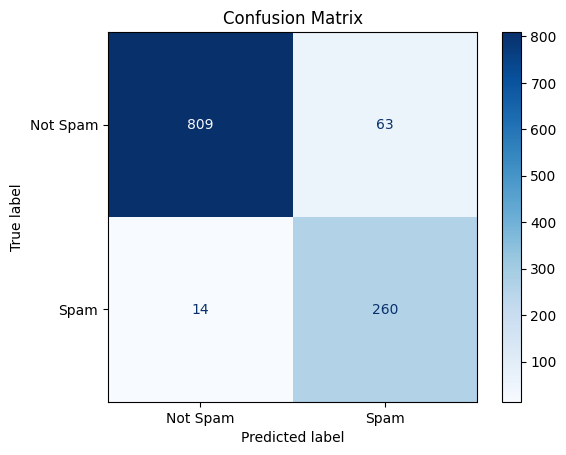

In [11]:
conf_matrix_display(best_dt)

#### Model 2: LogisticRegression

In [12]:
model2 = LogisticRegression(random_state=42)
pipeline2 = fit_model(model2)

print("The train score is {score}".format(score=pipeline2.score(train_X, train_Y)))
print("The validation score is {score}".format(score=pipeline2.score(val_X, val_Y)))
print("The test score is {score}".format(score=pipeline2.score(test_X, test_Y)))

The train score is 0.990395809080326
The validation score is 0.981675392670157
The test score is 0.9781849912739965


In [14]:
joblib.dump(pipeline2, 'model_logisticregression.pkl')

['model_logisticregression.pkl']

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       872
           1       0.98      0.92      0.95       274

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



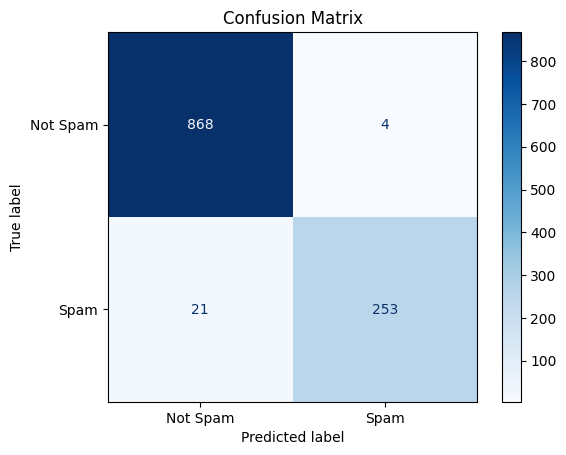

In [13]:
conf_matrix_display(model2)

#### Model 3: RandomForestClassifier

In [15]:
model3 = RandomForestClassifier(random_state=42)
pipeline3 = fit_model(model3)

print("The train score is {score}".format(score=pipeline3.score(train_X, train_Y)))
print("The validation score is {score}".format(score=pipeline3.score(val_X, val_Y)))
print("The test score is {score}".format(score=pipeline3.score(test_X, test_Y)))

The train score is 0.9997089639115251
The validation score is 0.9851657940663177
The test score is 0.9860383944153578


In [16]:
joblib.dump(pipeline3, 'model_randomforestclassifier.pkl')

['model_randomforestclassifier.pkl']

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       872
           1       0.98      0.96      0.97       274

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



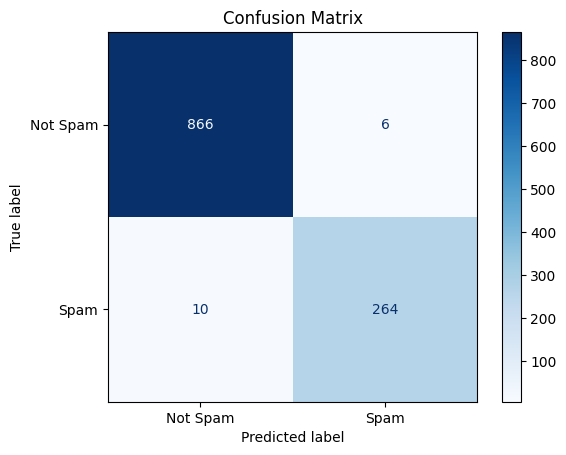

In [17]:
conf_matrix_display(model3)

## Conclusion

### We saw 3 different models; decision tree, logistic regression and a random forest. The best accuracies obtained (after fine tuning, if any) were 0.93, 0.98 and 0.99 respectively. So, the best model we obtained was a RandomForestClassfier with weighted average accuracy 0.99

In [1]:
import joblib

In [2]:
from score import score

In [3]:
threshold = 0.6
model = joblib.load('model_logisticregression.pkl')
text = 'ajsbdja jiasdasd 8793 jabsdji k83'

In [4]:
score(text, model, threshold)

(0.3070097474823908, 0)

In [1]:
%run test.py

.......
----------------------------------------------------------------------
Ran 7 tests in 4.605s

OK


In [1]:
def translate_text(target: str, text: str) -> dict:
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, bytes):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    print("Text: {}".format(result["input"]))
    print("Translation: {}".format(result["translatedText"]))
    print("Detected source language: {}".format(result["detectedSourceLanguage"]))

    return result


In [2]:
translate_text('es', 'Lady')

ModuleNotFoundError: No module named 'google.cloud'